# Machine Learning Model for Fraud Detection
Based on the paper by Kathrin Melcher and Rosaria Silipo in the Aug,2019 the intutition of machine learning for fraud detection came out. Machine learning is a very powerful tool for a variety of applications where it be making regression models to predict the power consumption of a particular household or understanding the photovoltaic potential in a particular area.
The problem currently under observation is Fraud Detection.
I have approached the problem in a systematic way:-
## Data-Preparation
The section is linked with importing the data and presenting some of the key features that can be observed just by looking at the data. Data visualization plays a very important role in this section. 
As mentioned in the tasks i have also provided check on missing vaues , the significance of outliers in the current dataset and resolved multicollinearity problem but have also shown the importance of the variables for this particular problem.
## Data- Preprocessing
Since the data is a highly unbalanced . I have undersampled the data and converted it to a simplified dataframe with the same features and behaviour as that of the original dataframe.
## ML Models
The training of the dataset has been done in 4 models in total. However the logistic regression also aided us in checking the significance of the independent variables.
The best f1-score has been obtained using RandomForestClassifier (0.99) with ANN model (0.92) being a close second.
In classification models the f1-score of the model is of much more importance than the accuracy thus it has been given the priority.Confusion matrix plot has also been added to give a visual representation of evaluated models.
## Output from the evaluation of the dataset
This is the section where we answer the question of what has the dataset analysis presented us.



## Table of Contents
- [1- Data-Preparation](#1)
    - [1.1 - Checking for NaN on the Dataset](#1-1)
    - [1.2 - Using z_score to check the outliers](#1-2)
    - [1.3 - Multi Collinearity](#1-3)
    - [1.4 - Making a Correlation Heatmap](#1-4)
    - [1.5 - Calculating the VIF (Variable Inflation Factors) and removing extra Depedent Variables](#1-5)
- [Data Preprocessing](#2)
    - [2.3 - Creating datasets for normal and fraudulent transactions ](#2-1)
    - [UnderSampling the data](#2-2)
    - [2.4 - Initialize the Parameters](#2-3)
- [ML Model](#3)
    - [Logistic Regression](#3-1)
    - [Feature Importance](#3-2)
    - [Using the refined dataset](#3-3)
    - [ANN model for classification using undersampling](#3-4)
    - [Random Forest Classifier](#3-5)
- [4 - Output from the evaluation of the dataset](#4)

<a name='1'></a>
## Data-Preparation

In [ ]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8 ]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("D:\Internship/Fraud.csv",sep=",")


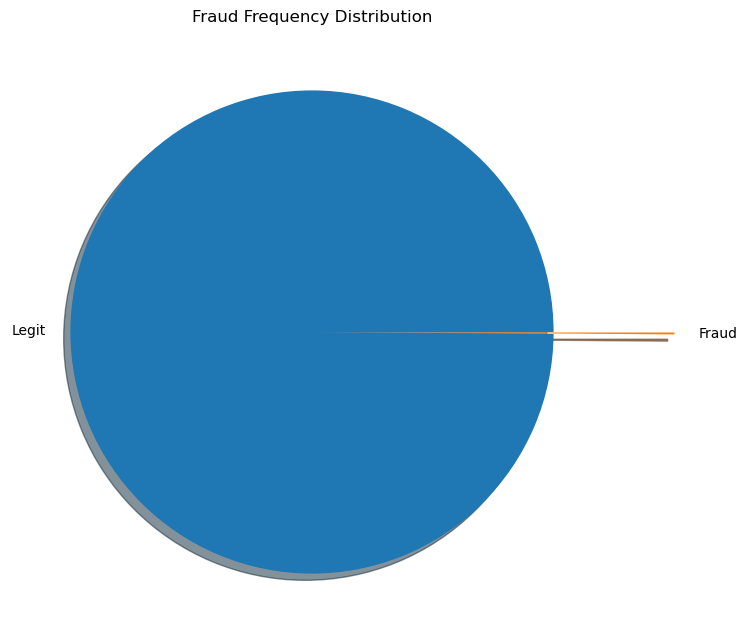

In [ ]:
counter = data.value_counts(data["isFraud"],sort = True)
plt.pie(counter,labels = ["Legit","Fraud"],shadow = True,explode =[0,0.5])
plt.title("Fraud Frequency Distribution")
plt.show()

In [ ]:
print(data.value_counts(data["isFlaggedFraud"],sort = True))
print(data.value_counts(data["isFraud"],sort = True))

isFlaggedFraud
0    6362604
1         16
dtype: int64
isFraud
0    6354407
1       8213
dtype: int64


Only 16 out of 8213 Frauds had been red-flagged

In [ ]:
data.head

<bound method NDFrame.head of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1  

In [ ]:
list(data.columns)

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
data['isFraud'].value_counts()
data.groupby('isFraud').mean()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,243.235663,1.781970e+05,8.328287e+05,855970.228109,1.101421e+06,1.224926e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


An important observation here is that the mean of amount for fradualant transaction is much higher than that of the mean for normal/legitimate transactions. 

<AxesSubplot:ylabel='Density'>

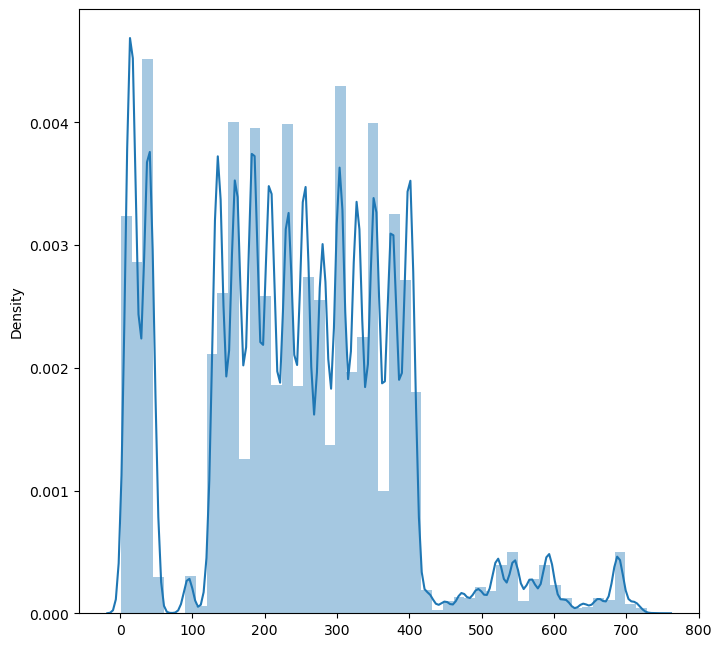

In [ ]:
# distribution of Time
time = data['step'].values
sns.distplot(time)

<a name='1-1'></a>
## Checking for NaN on the Dataset 

In [ ]:
#Checking for null values
data.isnull().values.sum() 

0

 The data thus doesn't comprise of any NaN values

<a name='1-2'></a>
## Using z_score to check the outliers


In [ ]:
amount = data["amount"]
outliers= []
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers


In [ ]:
outlier_pt=detect_outliers(amount)
outlier_pt


[2421578.09,
 2545478.01,
 2061082.82,
 3776389.09,
 2258388.15,
 2223005.62,
 2107293.71,
 2317408.88,
 2604219.11,
 2441078.3,
 2032275.62,
 2474181.78,
 2837270.65,
 10000000.0,
 10000000.0,
 2930418.44,
 2930418.44,
 2025330.83,
 2062692.94,
 2576294.8,
 2102252.96,
 2222097.28,
 2511647.23,
 2241254.39,
 2011670.91,
 2940764.72,
 2943845.35,
 2861134.92,
 2153550.39,
 5460002.91,
 5460002.91,
 2316902.39,
 2301415.25,
 2283519.94,
 2245813.81,
 2271227.47,
 2063647.78,
 2552176.18,
 2848328.52,
 2234288.78,
 2702697.15,
 2022478.14,
 2059918.28,
 2206784.53,
 2026545.3,
 3236850.76,
 2794982.53,
 3457807.35,
 2767908.66,
 2614699.02,
 2014771.88,
 2107356.28,
 2195051.02,
 2241986.78,
 2015246.93,
 2304548.56,
 2628265.07,
 2117027.99,
 2352703.57,
 2416072.81,
 2370301.7,
 2068925.43,
 2783998.4,
 5677662.29,
 2612615.69,
 2604737.7,
 3007043.04,
 2325148.88,
 3903432.11,
 2419330.48,
 2106899.77,
 2158290.89,
 2420979.43,
 2597158.62,
 2047252.95,
 2029109.94,
 2300391.28,
 2145

Although removing the outliers from a dataset is considered good;The amount mentioned in our dataset must not be error in data entry .They can be though of as real monetory transaction for any big financial company.Moreover, an amount transfer ,greater than 200,000 is automatically suspected as Fraudulent Transaction. Thus they will be a intergral to model evaluation we would just need to have both train and test sets have the same proportion of outliers. 


<a name='1-3'></a>
# Multi Collinearity

In [ ]:
from scipy.stats import spearmanr
corr, _ = spearmanr(data["isFraud"], data["isFlaggedFraud"])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.044


The correlation between "isFraud" and "isFlaggedFraud" gives us the idea of how well the financial system is equipped to identify frauds occuring in their system. Thus an exclusive mention has been made here. The Spearmans Correlation tells us there is hardly any relation between the two of them thus informing us that the system is quite inefficient. 

<a name='1-4'></a>
## Making a Correlation Heatmap

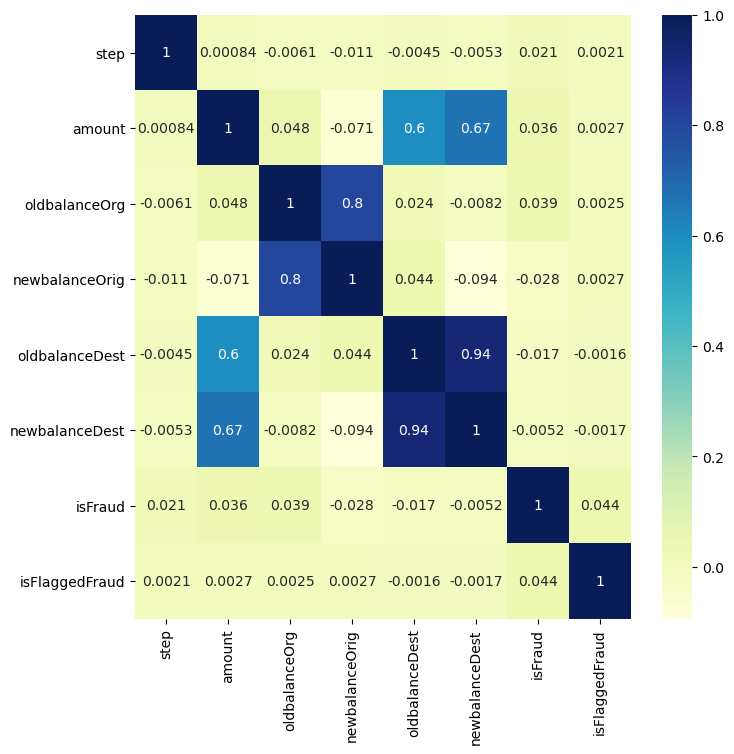

In [ ]:
#Creating a Correlation  Heatmap
sns.heatmap(data.corr(method = "spearman"),annot = True, cmap= "YlGnBu")
plt.show()

Consider the heatmap ; A very strong relationship between the "newbalanceOrig" and "oldbalanceOrg" persists similar can be said for the "newbalanceDest" and "oldbalanceDest". These variables might have similaar VIF's and thus removing a variable from the 2 pairs respectively will provide us with a better model.Though removal of these variables is entirely case dependent.

<a name='1-5'></a>
## Calculating the VIF (Variable Inflation Factors) and removing extra Depedent Variables


In [ ]:
#Dropping columns (strings) that will not contribute to our model 
df = data.drop(["step","type","nameOrig","nameDest"],axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_1=df.drop(["isFraud"],axis = 1)#removing of target variable is important in calculating VIF
vif_= pd.DataFrame()
vif_["features"] = vif_1.columns
vif_["vif_Factor"] = [variance_inflation_factor(vif_1.values, i) for i in range(vif_1.shape[1])]
print(vif_)

         features  vif_Factor
0          amount    3.864097
1   oldbalanceOrg  464.014156
2  newbalanceOrig  465.358557
3  oldbalanceDest   70.476690
4  newbalanceDest   82.198252
5  isFlaggedFraud    1.000565


VIF basically measures the depencies of the independent vairables upon each other.VIF score of an independent variable represents how well the variable is explained by other independent variables. For scores above 10 for VIF, severe multicollinearity is a problem as it can increase the variance of the coefficient estimates and make the estimates very sensitive to minor changes in the model

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_2=df.drop(["isFraud","oldbalanceOrg","newbalanceDest"],axis = 1)
vif_ = pd.DataFrame()
vif_["features"] = vif_2.columns
vif_["vif_Factor"] = [variance_inflation_factor(vif_2.values, i) for i in range(vif_2.shape[1])]
print(vif_)

         features  vif_Factor
0          amount    1.145983
1  newbalanceOrig    1.023012
2  oldbalanceDest    1.165392
3  isFlaggedFraud    1.000186


Variables "oldbalanceOrg" and "newbalanceDest" have been removed for illustration of how the VIF become ideal(near to 1) upon their removal.



But how helpful has this process been for our model. Let's check out with a simple linear regression (using binary cross-entropy to find if it's a good fit our orignial problem) whether removing the independent variables improved our model or has worsened it.

<a name='2'></a>
# Data-Preprocessing 


<a name='2-1'></a>
### Creating datasets for normal and fraudulent transactions

In [ ]:
legit = df[df.isFraud == 0]
fraud = df[df.isFraud == 1] 

print(legit.shape,fraud.shape)#notice the shape of the dataframe...

(6354407, 7) (8213, 7)


Clearly the dataset is highly unbalanced. Thus we need to carry out either undersampling or oversampling.

<a name='2-2'></a>
## UnderSampling the data


In [ ]:
legit_sample = legit.sample(n =fraud.shape[0])
new_dataset = pd.concat([legit_sample,fraud],axis = 0)

In [ ]:
new_dataset.head


<bound method NDFrame.head of              amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
3829627   173595.11           0.00            0.00       486152.71   
1953959     8975.30           0.00            0.00        59248.65   
1309743    24692.06     9811375.63      9836067.68       759705.31   
1008408    20560.93          22.00            0.00            0.00   
5127402    64598.65           0.00            0.00      1654955.35   
...             ...            ...             ...             ...   
6362615   339682.13      339682.13            0.00            0.00   
6362616  6311409.28     6311409.28            0.00            0.00   
6362617  6311409.28     6311409.28            0.00        68488.84   
6362618   850002.52      850002.52            0.00            0.00   
6362619   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFraud  isFlaggedFraud  
3829627       659747.82        0               0  
1953959        68223.95    

<a name='2-3'></a>
## Using the dataset without removing High VIF causing variables

In [ ]:
new_dataset['isFraud'].value_counts()
new_dataset.groupby('isFraud').mean()


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,
0,1.734324e+05,8.067891e+05,829384.755807,1.068524e+06,1.190741e+06,0.000000
1,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


The new_dataset created by undersampling has almost the same mean as that of the original dataset. Thus making it a valid dataframe to train our model on.

In [ ]:
X = new_dataset.drop(columns = 'isFraud',axis =1)#dropping the target variable before split
Y = new_dataset["isFraud"]#creating another dataframe with the target variable in it

In [ ]:
X.shape,Y.shape

((16426, 6), (16426,))

In [ ]:
#Splitting the data into training data and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y,random_state = 0)
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(13140, 6) (3286, 6)
(13140,) (3286,)


<a name='3'></a>
# ML Models

<a name='3-1'></a>
# Logistic Regression

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#training the model
model.fit(X_train,y_train)

#Accuracy on training data
from sklearn.metrics import accuracy_score
X_train_pred = model.predict(X_train)
training_data_acc =accuracy_score(X_train_pred,y_train)

X_test_pred = model.predict(X_test)
test_data_acc = accuracy_score(X_test_pred, y_test)

print("Classification Report: \n", classification_report(y_test, X_test_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.80      0.88      1643
           1       0.83      0.98      0.90      1643

    accuracy                           0.89      3286
   macro avg       0.90      0.89      0.89      3286
weighted avg       0.90      0.89      0.89      3286



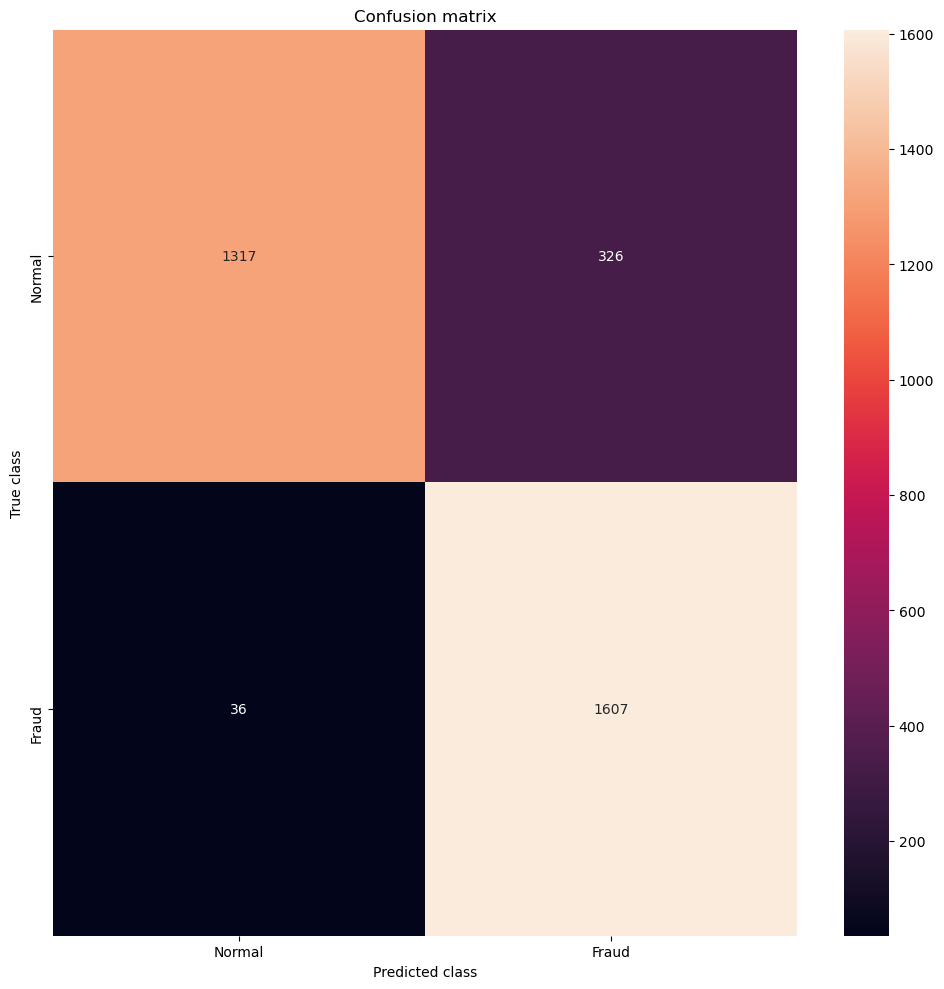

In [ ]:
from sklearn.metrics import confusion_matrix
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, X_test_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

<a name='3-2'></a>
### Feature Importance

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})

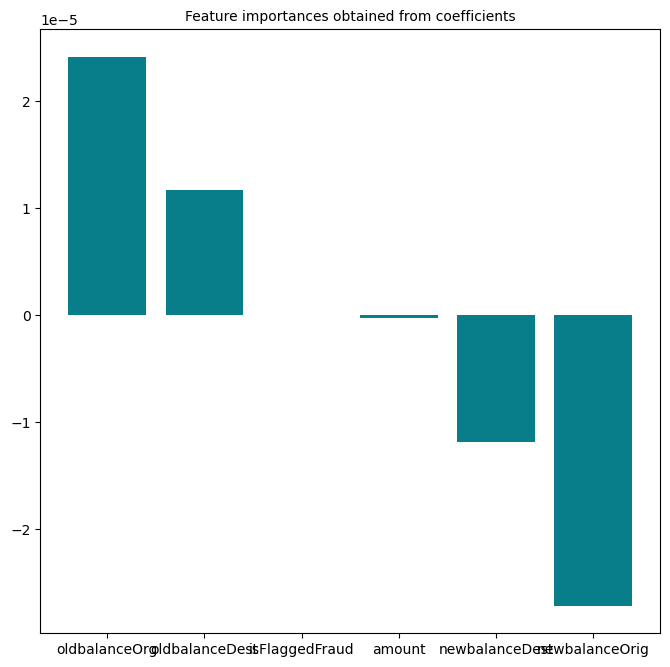

In [ ]:
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation= 0 )
plt.show()

The graph shows us the importance of the features in the dataset as evident that isFlaggedFraud has a very little contribution to the data set while rest features have significant contribution to the determination of the classification.


<a name='3-3'></a>
### Using the refined dataset

In [ ]:
df = data.drop(["step","type","nameOrig","nameDest","oldbalanceOrg","newbalanceDest"],axis = 1)

In [ ]:
legit = df[df.isFraud == 0]
fraud = df[df.isFraud == 1] 

print(legit.shape,fraud.shape)#notice the shape of the dataframe..

(6354407, 5) (8213, 5)


In [ ]:
legit_sample = legit.sample(n =fraud.shape[0])
new_dataset = pd.concat([legit_sample,fraud],axis = 0)

In [ ]:
new_dataset['isFraud'].value_counts()
new_dataset.groupby('isFraud').mean()


,amount,newbalanceOrig,oldbalanceDest,isFlaggedFraud
isFraud,,,,
0,1.747386e+05,879487.198602,1.092952e+06,0.000000
1,1.467967e+06,192392.631836,5.442496e+05,0.001948


In [ ]:
X = new_dataset.drop(columns = 'isFraud',axis =1)#dropping the target variable before split
Y = new_dataset["isFraud"]#creating another dataframe with the target variable in it

In [ ]:
#Splitting the data into training data and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y,random_state = 0)
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(13140, 4) (3286, 4)
(13140,) (3286,)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#training the model
model.fit(X_train,y_train)

#Accuracy on training data
from sklearn.metrics import accuracy_score
X_train_pred = model.predict(X_train)
training_data_acc =accuracy_score(X_train_pred,y_train)

X_test_pred = model.predict(X_test)
test_data_acc = accuracy_score(X_test_pred, y_test)

print("Classification Report: \n", classification_report(y_test, X_test_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.45      0.58      1643
           1       0.62      0.90      0.74      1643

    accuracy                           0.68      3286
   macro avg       0.72      0.68      0.66      3286
weighted avg       0.72      0.68      0.66      3286



We can clearly see that using the so "refined" dataset which had low VIF that f1 score(which is the function of precision and recall and a very important characteristic for classification problems) dropped quite heavily.Thus removing the 2 independent variables was not helpful here.

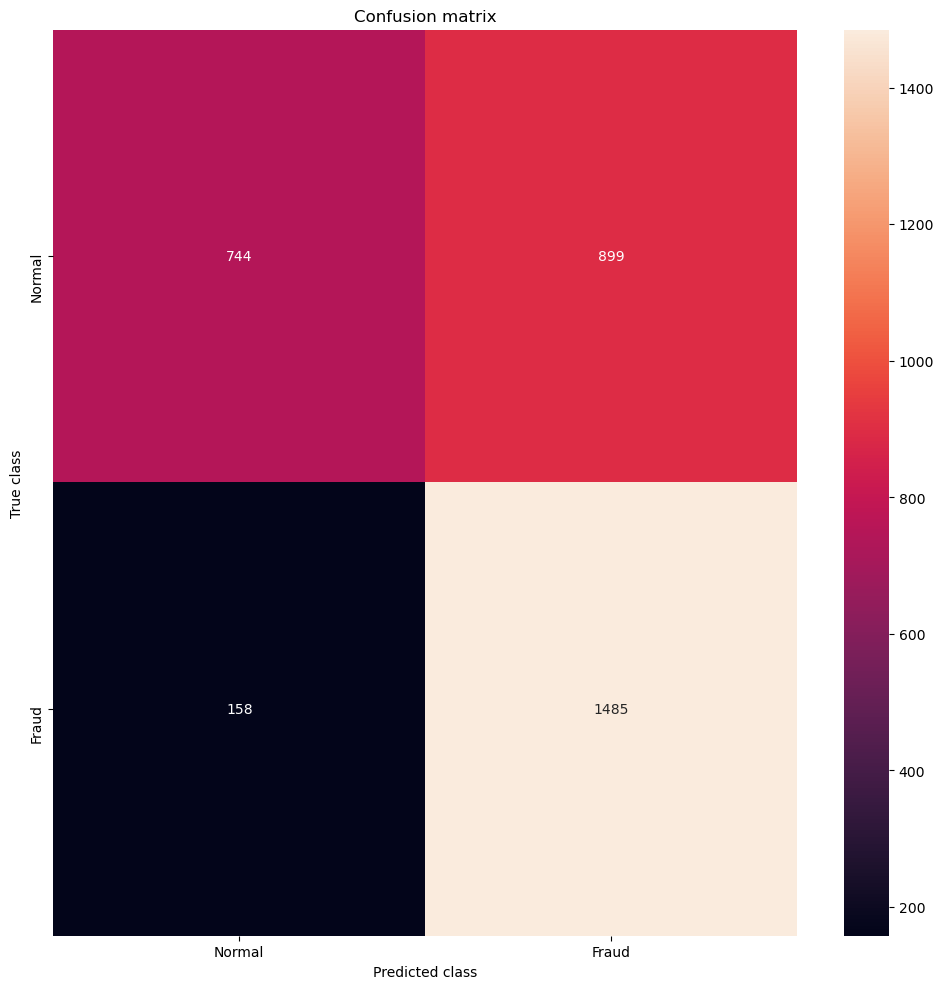

In [ ]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test,X_test_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

<a name='3-4'></a>
# ANN model for classification using undersampling



#### owning to our results above we are going to be using the old dataset i.e
    df = data.drop(["step","type","nameOrig","nameDest"],axis = 1)
    and not 
    df = data.drop(["step","type","nameOrig","nameDest","oldbalanceOrg","newbalanceDest"],axis = 1)

In [ ]:
df = data.drop(["step","type","nameOrig","nameDest"],axis = 1)

In [ ]:
legit = df[df.isFraud == 0]
fraud = df[df.isFraud == 1] 

print(legit.shape,fraud.shape)#notice the shape of the dataframe..

(6354407, 7) (8213, 7)


In [ ]:
legit_sample = legit.sample(n =fraud.shape[0])
new_dataset = pd.concat([legit_sample,fraud],axis = 0)

In [ ]:
new_dataset['isFraud'].value_counts()
new_dataset.groupby('isFraud').mean()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,
0,1.858435e+05,8.059633e+05,827668.667968,1.126752e+06,1.254740e+06,0.000000
1,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


In [ ]:
X = new_dataset.drop(columns = 'isFraud',axis =1)#dropping the target variable before split
Y = new_dataset["isFraud"]#creating another dataframe with the target variable in it

In [ ]:
#Splitting the data into training data and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y,random_state = 0)
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(13140, 6) (3286, 6)
(13140,) (3286,)


In [ ]:
import tensorflow as tf
def ANN(X_train, y_train, X_test, y_test, loss,weights):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(26,input_shape =(X_train.shape[0], X_train.shape[1]), activation='relu'),
        tf.keras.layers.Dense(13, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train,epochs=35)
    else:
        model.fit(X_train, y_train, epochs=100,class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy',-1)


Epoch 1/35
411/411 [==============================] - 2s 4ms/step - loss: 45471.1948 - accuracy: 0.6939
Epoch 2/35
411/411 [==============================] - 1s 4ms/step - loss: 2102.0608 - accuracy: 0.8137
Epoch 3/35
411/411 [==============================] - 5s 11ms/step - loss: 1195.2381 - accuracy: 0.8477
Epoch 4/35
411/411 [==============================] - 2s 4ms/step - loss: 1529.3247 - accuracy: 0.8714
Epoch 5/35
411/411 [==============================] - 2s 4ms/step - loss: 2520.7263 - accuracy: 0.8953
Epoch 6/35
411/411 [==============================] - 2s 4ms/step - loss: 1167.0821 - accuracy: 0.9077
Epoch 7/35
411/411 [==============================] - 2s 4ms/step - loss: 1217.6816 - accuracy: 0.9078
Epoch 8/35
411/411 [==============================] - 2s 5ms/step - loss: 2142.7689 - accuracy: 0.8938
Epoch 9/35
411/411 [==============================] - 2s 5ms/step - loss: 3097.9714 - accuracy: 0.8920
Epoch 10/35
411/411 [==============================] - 2s 4ms/step - lo

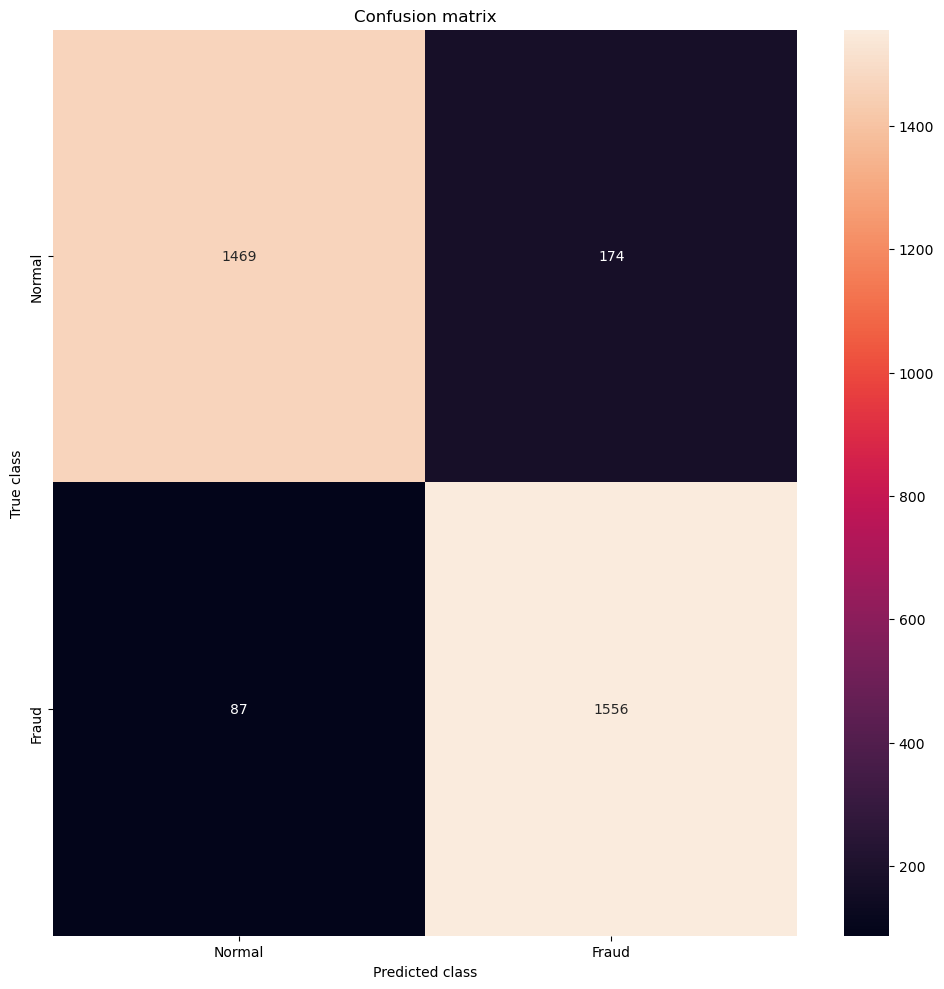

In [ ]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test,y_preds)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

<a name='3-5'></a>
## Random Forest Classifier


In [ ]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
y_pred = rfc.predict(X_test)
print("Classification Report: \n", classification_report(y_test, y_pred))


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1643
           1       0.98      1.00      0.99      1643

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



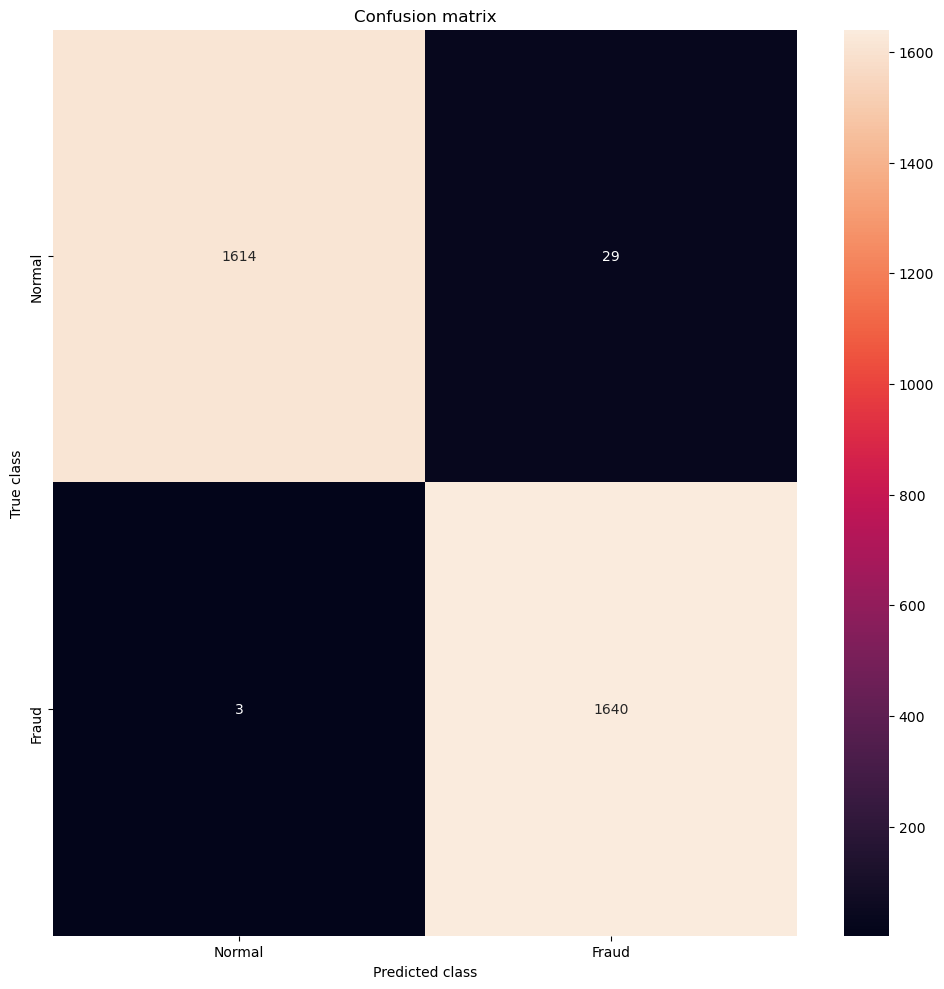

In [ ]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Thus we can see that Random Forest Classification provides us with the best results among our 3 models.


<a name='4'></a>
## Output from the Analysis

### What are the key factors that predict fradulent customers?
The feature importance graph shows us that the factors that affect our algorithm most intimately are "oldbalanceOrg"	"newbalanceOrig"	"oldbalanceDest"	"newbalanceDest" . While amount shows some importance the "isFlaggedFraud" doesn't have any importance in predicting fradulent customers.

### Do these factors make sense?
Yes, the "oldbalanceOrg"	"newbalanceOrig"	"oldbalanceDest"	"newbalanceDest" play a huge impact in predicting a fradulent customer . A senario where a person who has a large amount of money deposited in his/her financial firm for a substantial amount of time and suddently they  either take out the full amount or tranfer it to some other anonymous account should raise an eyebrow among the members of the firm. 
While the amount transacted could have also shown a very large importance it's importance is still relevant for the cases similar as the above situation. Thus the factors do make sense.
Additionally no importance of "isFlaggedFraud" shows that the company's model works when the funds are tranferred electronically but has zero impact on the other senarios(such as cash_out etc.) shows that the company's security can be easily passed through.

### What kind of prevention can be taken ?
The company should equip their customers with RFID and fingerprint scan or retina scan should be must for transcations exceeding the determined limit. The company's model for online transaction was able to alarm the employees for only 16 potential frauds out of the 8213 that had occured. A better classification of potential frauds is quickly required to make the model a better fit for the company's interest. The company's data scientist should evaluate its data over the past years of what is the most common mode of fraud that it has suffered additionally and try to make a company specific algorithm to get rid of fraudsters in real-time.


### How would one ensure the preventive actions work
The data scientist of the company should  maintain the fingerprint and retina scans of the users ,they must be kept in secured encrypted server of the company so that hackers would find tough to decrypt them. Awareness must also be spread among the customers to not to fall prey to malicious people looking to get their hands on money. The company should provide stict guidelines to their employees that even a slight abnormality should be handled with utmost care to prevent any future frauds.
The datascients and the security cheifs should also try to find out new methods to out do the hackers.